In [1]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\AB92922\Downloads\news.csv", index_col=None)
dataset = df.drop("Unnamed: 0", axis=1)

In [3]:
# Split dataset into features and target
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=42)

In [4]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [5]:
# Text preprocessing with HashingVectorizer
hashing_vectorizer = HashingVectorizer(stop_words='english', n_features=2**20, dtype=np.float32)
hashing_train = hashing_vectorizer.fit_transform(X_train)
hashing_test = hashing_vectorizer.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(hashing_train.astype('float32'), y_train_encoded)
y_pred_log_reg = log_reg.predict(hashing_test.astype('float32'))

# Evaluation
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_log_reg, target_names=label_encoder.classes_))



Logistic Regression
Accuracy: 0.9096126255380201
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91      1071
        REAL       0.92      0.89      0.91      1020

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091



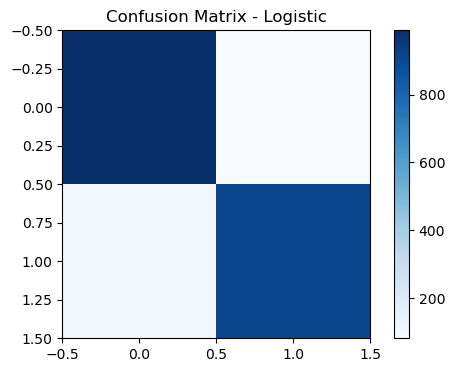

In [7]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred_log_reg)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic')
plt.colorbar()
plt.show()

In [10]:
# Make predictions using the trained Logistic Regression model
y_pred_log = log_reg.predict(hashing_test)

# Display first 10 predictions
print("First 10 predictions:", y_pred_log[:10])

# Display corresponding true labels for comparison
print("True labels for the first 10 samples:", y_test[:10].values)


First 10 predictions: [0 0 0 0 0 0 1 0 1 0]
True labels for the first 10 samples: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE']
